### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Choose **number of Convolutional-Pooling pairs**  
**--> Step 4:** Visualize built CNN models  
**--> Step 5:** Set up learning rate & epochs  
**--> Step 6:** Train built CNN models  
**--> Step 7:** Show and plot accuracies  
**--> Step 8:** Make a conclusion  


**Result:**  
- Chosen architecture for every preprocessed dataset  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings('ignore')

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [2]:
with h5py.File('dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [3]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(36288, 48, 48, 3)
(36288,)
(12440, 48, 48, 3)
(12440,)
(3111, 48, 48, 3)
(3111,)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [4]:
# Showing class index from the vector
print('Class index from vector:', y_train[0])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 43)
y_validation = to_categorical(y_validation, num_classes = 43)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[0])


Class index from vector: 12

(36288, 43)
(12440, 43)

Class index from matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 3: Choosing number of Convolutional-Pooling pairs

In [5]:
# Building 1st model
# RGB --> {8C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_1 = Sequential()

# Adding first pair {8C5-P2}
model_1.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_1.add(MaxPool2D())

# Adding fully connected layers
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(43, activation='softmax'))

# Compiling created model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('1st model is compiled successfully')



# Building 2nd model
# RGB --> {8C5-P2} --> {16C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_2 = Sequential()

# Adding first pair {8C5-P2}
model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_2.add(MaxPool2D())

# Adding fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(43, activation='softmax'))

# Compiling created model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('2nd model is compiled successfully')



# Building 3rd model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_3 = Sequential()

# Adding first pair {8C5-P2}
model_3.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_3.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_3.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_3.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_3.add(MaxPool2D())

# Adding fully connected layers
model_3.add(Flatten())
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(43, activation='softmax'))

# Compiling created model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('3rd model is compiled successfully')



# Building 4th model
# RGB --> {8C5-P2} --> {16C5-P2} --> {32C5-P2} --> {64C3-P2} --> 128 --> 43

# Initializing model to be as linear stack of layers
model_4 = Sequential()

# Adding first pair {8C5-P2}
model_4.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(48, 48, 3)))
model_4.add(MaxPool2D())

# Adding second pair {16C5-P2}
model_4.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding third pair {32C5-P2}
model_4.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
model_4.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model_4.add(MaxPool2D())

# Adding fully connected layers
model_4.add(Flatten())
model_4.add(Dense(128, activation='relu'))
model_4.add(Dense(43, activation='softmax'))

# Compiling created model
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Check point
print('4th model is compiled successfully')


1st model is compiled successfully
2nd model is compiled successfully
3rd model is compiled successfully
4th model is compiled successfully


2021-12-02 22:01:53.608937: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 4: Visualizing built CNN models

In [6]:
from keras.models import load_model

In [7]:
model_3_reconst = load_model("h_3.h5")

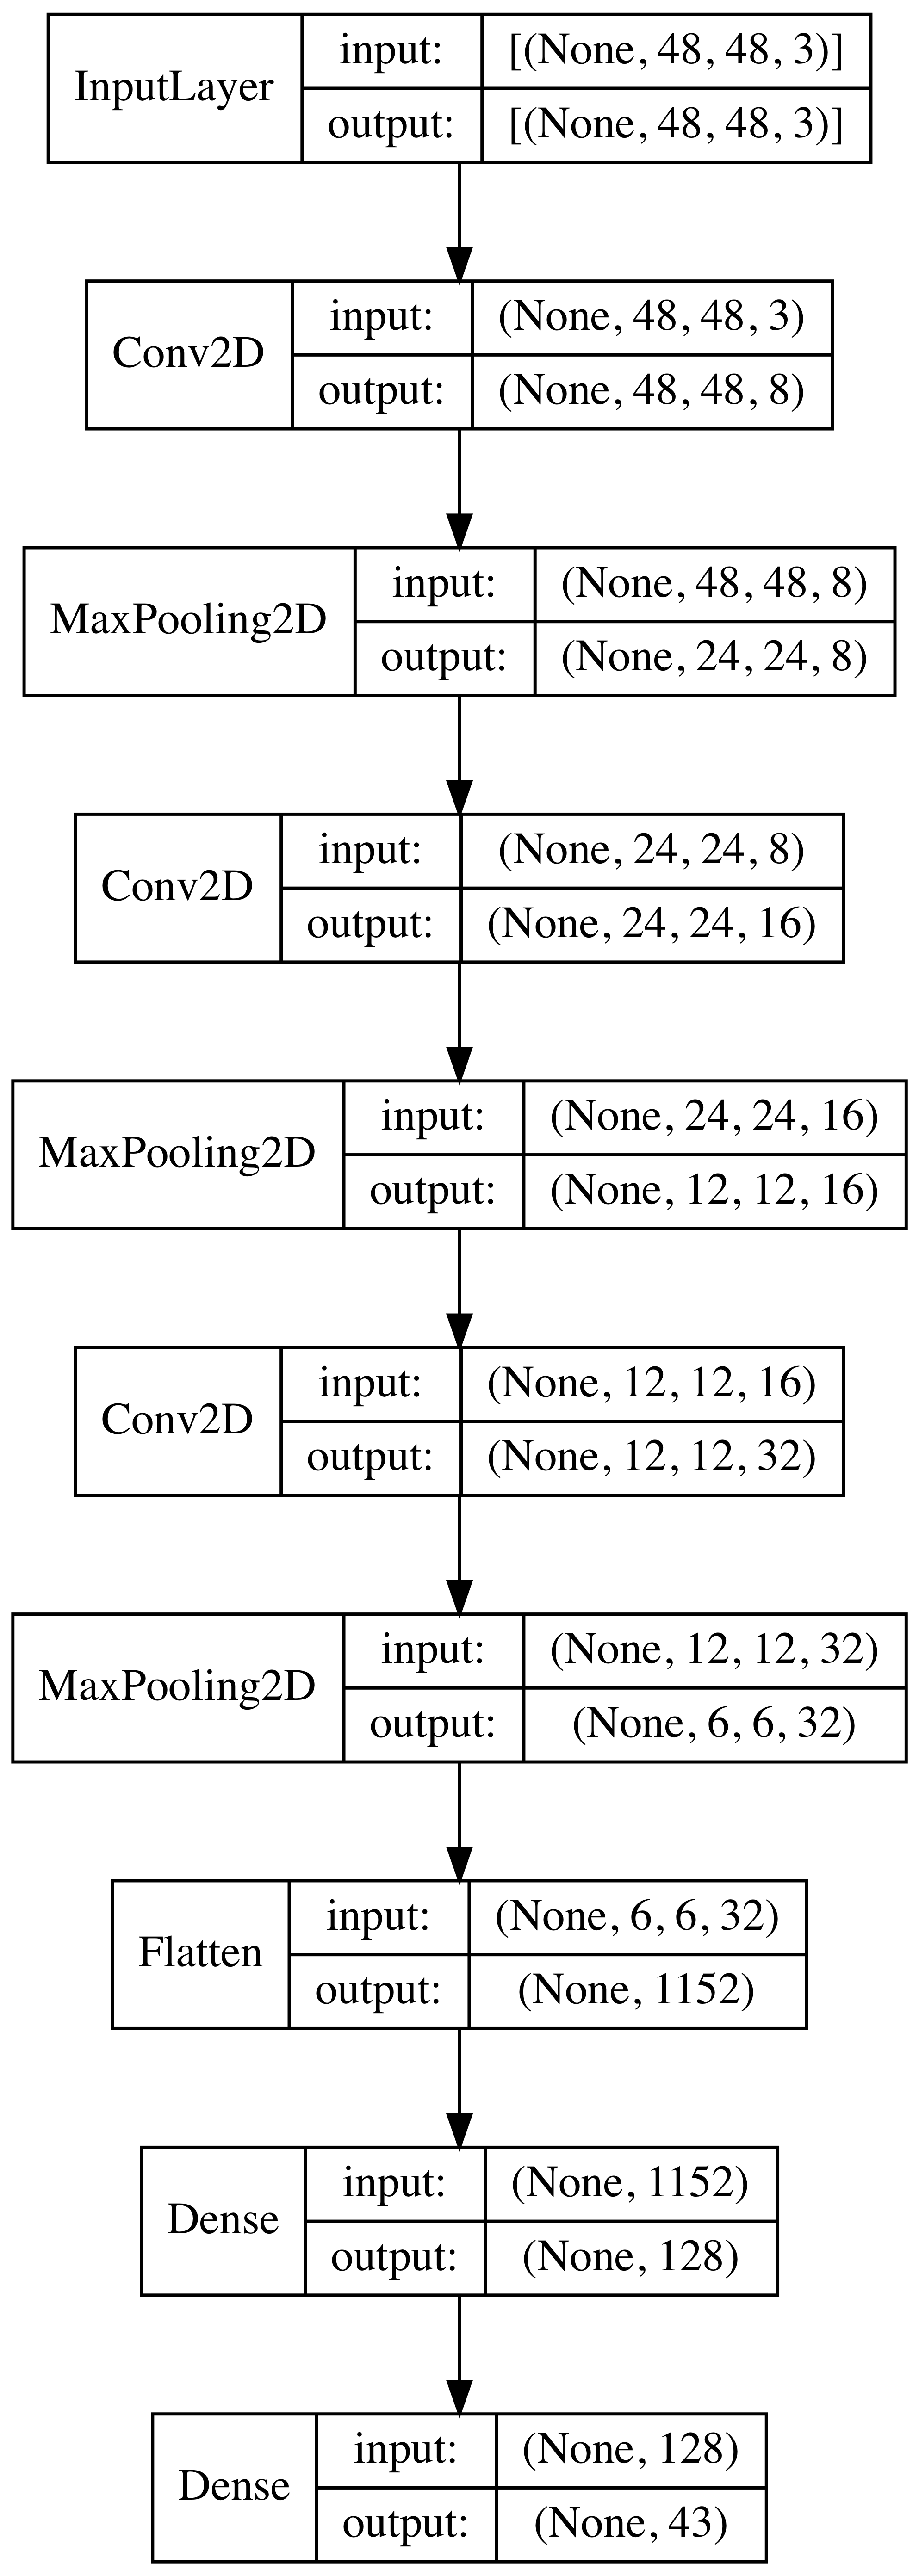

In [8]:
# Plotting model's layers in form of flowchart
plot_model(model_3_reconst,
           to_file='model.png',
           show_shapes=True,
           show_layer_names=False,
           rankdir='TB',
           dpi=500)


In [9]:
# Showing model's summary in form of table
model_3_reconst.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 8)         608       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 5: Setting up learning rate & epochs

In [10]:
# Defining number of epochs
epochs = 20

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 6: Training built CNN models

In [11]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training 1st model
h_1 = model_1.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 2nd model
h_2 = model_2.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 3rd model
h_3 = model_3.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


# Training 4th model
h_4 = model_4.fit(x_train, y_train,
                  batch_size=50,
                  epochs=epochs, 
                  validation_data=(x_validation, y_validation),
                  callbacks=[learning_rate],
                  verbose=1)


2021-12-02 22:01:56.952370: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0003584859224085419.
726/726 [==============================] - 36s 49ms/step - loss: 0.8417 - accuracy: 0.7858 - val_loss: 0.3213 - val_accuracy: 0.9258
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0003405616262881148.
726/726 [==============================] - 36s 50ms/step - loss: 0.2401 - accuracy: 0.9398 - val_loss: 0.2179 - val_accuracy: 0.9416
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.000323533544973709.
726/726 [==============================] - 31s 43ms/step - loss: 0.1492 - accuracy: 0.9638 - val_loss: 0.1835 - val_accuracy: 0.9539
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.00030735686772502356.
726/726 [==============================] - 31s 43ms/step - loss: 0.1020 - accuracy: 0.9748 - val_loss: 0.1488 - val_accuracy: 0.9661
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.00029198902433

726/726 [==============================] - 52s 71ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0683 - val_accuracy: 0.9893
Epoch 17/20

Epoch 00017: LearningRateScheduler setting learning rate to 0.0001577792147882268.
726/726 [==============================] - 50s 69ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0625 - val_accuracy: 0.9905
Epoch 18/20

Epoch 00018: LearningRateScheduler setting learning rate to 0.00014989025404881545.
726/726 [==============================] - 53s 73ms/step - loss: 8.1881e-04 - accuracy: 0.9999 - val_loss: 0.0650 - val_accuracy: 0.9902
Epoch 19/20

Epoch 00019: LearningRateScheduler setting learning rate to 0.00014239574134637466.
726/726 [==============================] - 55s 76ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1123 - val_accuracy: 0.9812
Epoch 20/20

Epoch 00020: LearningRateScheduler setting learning rate to 0.00013527595427905592.
726/726 [==============================] - 52s 72ms/step - loss: 0.0021 - acc

726/726 [==============================] - 82s 112ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.0592 - val_accuracy: 0.9842
Epoch 13/20

Epoch 00013: LearningRateScheduler setting learning rate to 0.00019371148445850088.
726/726 [==============================] - 98s 135ms/step - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0680 - val_accuracy: 0.9837
Epoch 14/20

Epoch 00014: LearningRateScheduler setting learning rate to 0.00018402591023557584.
726/726 [==============================] - 91s 126ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0447 - val_accuracy: 0.9909
Epoch 15/20

Epoch 00015: LearningRateScheduler setting learning rate to 0.000174824614723797.
726/726 [==============================] - 95s 130ms/step - loss: 9.3514e-04 - accuracy: 0.9999 - val_loss: 0.0707 - val_accuracy: 0.9844
Epoch 16/20

Epoch 00016: LearningRateScheduler setting learning rate to 0.00016608338398760718.
726/726 [==============================] - 98s 135ms/step - loss: 0.0110 -

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 7: Showing and plotting accuracies

In [12]:
# Accuracies of the 1st model
print('Model 1: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_1.history['accuracy']),
                                                                  max(h_1.history['val_accuracy'])))


# Accuracies of the 2nd model
print('Model 2: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_2.history['accuracy']),
                                                                  max(h_2.history['val_accuracy'])))


# Accuracies of the 3rd model
print('Model 3: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                           format(max(h_3.history['accuracy']),
                                                                  max(h_3.history['val_accuracy'])))


# Accuracies of the 4th model
print('Model 4: Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                          format(max(h_4.history['accuracy']),
                                                                 max(h_4.history['val_accuracy'])))


Model 1: Training accuracy=0.99972, Validation accuracy=0.98368
Model 2: Training accuracy=0.99994, Validation accuracy=0.99100
Model 3: Training accuracy=1.00000, Validation accuracy=0.99172
Model 4: Training accuracy=0.99986, Validation accuracy=0.99212


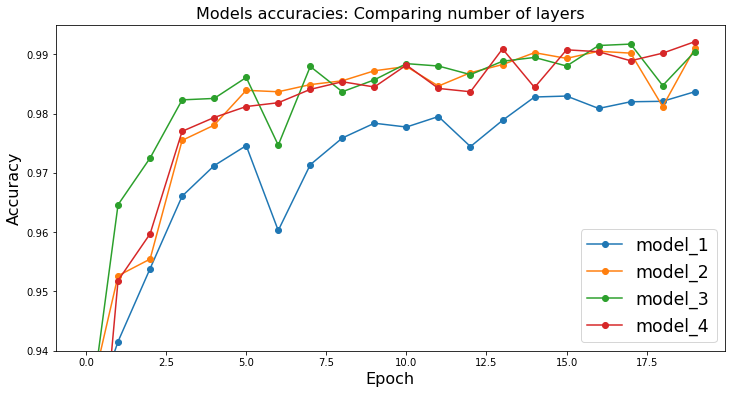

In [17]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h_1.history['val_accuracy'], '-o')
plt.plot(h_2.history['val_accuracy'], '-o')
plt.plot(h_3.history['val_accuracy'], '-o')
plt.plot(h_4.history['val_accuracy'], '-o')


# Setting limit along Y axis
plt.ylim(0.94, 0.995)


# Showing legend
plt.legend(['model_1', 'model_2', 'model_3', 'model_4'], loc='lower right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Models accuracies: Comparing number of layers', fontsize=16)
plt.savefig('Layers_Comparison.png', dpi = 500, bbox_inches='tight')

# Showing the plot
plt.show()


In [14]:
# Showing list of scheduled learning rate for every epoch
print(h_1.history['lr'])


[0.00035848594, 0.00034056162, 0.00032353355, 0.00030735688, 0.000291989, 0.00027738957, 0.0002635201, 0.00025034408, 0.00023782688, 0.00022593554, 0.00021463877, 0.00020390682, 0.00019371149, 0.0001840259, 0.00017482461, 0.00016608338, 0.00015777921, 0.00014989026, 0.00014239574, 0.00013527596]


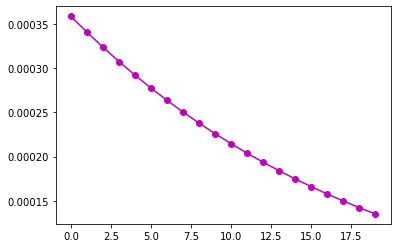

In [15]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Plotting scheduled learning rate
plt.plot(h_1.history['lr'], '-mo')


# Showing the plot
plt.show()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 8: Making a conclusion

In [16]:
# Model 3 seems to be the best performing model based on the validation accuracy

#model_3.save('h_3.h5')